In [888]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

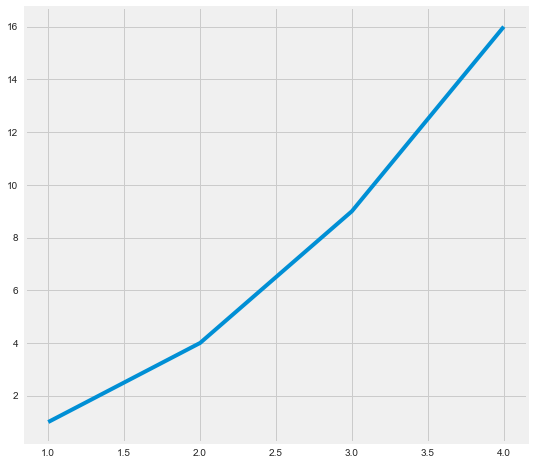

In [889]:
fig, ax = plt.subplots(figsize = (8,8))

x = [1,2,3,4]
y = [x**2 for x in x]

ax.plot(x,y)
plt.show()

In [834]:
strava_df = pd.read_csv('Datasets/Strava/activities.csv')
strava_df = strava_df.loc[:,'Activity Date':'Distance']

In [835]:
strava_df.head()

,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance
0,"Jan 4, 2020, 2:57:37 PM",Afternoon Run,Run,NaN,1509,5
1,"Jan 6, 2020, 4:07:35 PM",Afternoon Run,Run,NaN,721,2.5
2,"Jan 12, 2020, 10:06:24 AM",Morning Run,Run,NaN,1364,5
3,"Jan 12, 2020, 2:26:39 PM",Afternoon Activity,Workout,NaN,5360,4.29
4,"Jan 23, 2020, 5:02:40 PM",Afternoon Ride,Ride,NaN,1807,0.37


In [836]:
print(strava_df['Activity Type'].unique())

['Run' 'Workout' 'Ride' 'Hike' 'Swim']


In [837]:
strava_df = strava_df[(strava_df['Activity Type'] == 'Run') | (strava_df['Activity Type'] == 'Workout')]
strava_df[(strava_df['Activity Type'] == 'Workout')]

,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance
3,"Jan 12, 2020, 2:26:39 PM",Afternoon Activity,Workout,NaN,5360,4.29


In [838]:
strava_df = strava_df.drop(['Activity Name', 'Activity Type', 'Activity Description'], axis = 1)
print(strava_df)

                 Activity Date  Elapsed Time Distance
0      Jan 4, 2020, 2:57:37 PM          1509        5
1      Jan 6, 2020, 4:07:35 PM           721      2.5
2    Jan 12, 2020, 10:06:24 AM          1364        5
3     Jan 12, 2020, 2:26:39 PM          5360     4.29
5      Feb 2, 2020, 6:01:03 PM          1513     4.87
..                         ...           ...      ...
134    Jul 8, 2021, 8:43:07 AM          3054     9.97
136  Jul 11, 2021, 12:26:05 PM          3176       10
138  Jul 13, 2021, 11:39:15 AM          1572     4.99
139  Jul 15, 2021, 10:00:36 AM          3346    10.03
141   Jul 17, 2021, 7:19:33 AM          1620     5.02

[128 rows x 3 columns]


In [839]:
strava_df['Elapsed Time'] = strava_df['Elapsed Time']/60

In [840]:
strava_df

,Activity Date,Elapsed Time,Distance
0,"Jan 4, 2020, 2:57:37 PM",25.150000,5
1,"Jan 6, 2020, 4:07:35 PM",12.016667,2.5
2,"Jan 12, 2020, 10:06:24 AM",22.733333,5
3,"Jan 12, 2020, 2:26:39 PM",89.333333,4.29
5,"Feb 2, 2020, 6:01:03 PM",25.216667,4.87
...,...,...,...
134,"Jul 8, 2021, 8:43:07 AM",50.900000,9.97
136,"Jul 11, 2021, 12:26:05 PM",52.933333,10
138,"Jul 13, 2021, 11:39:15 AM",26.200000,4.99
139,"Jul 15, 2021, 10:00:36 AM",55.766667,10.03


In [841]:
strava_df['Activity Date'] = pd.to_datetime(strava_df['Activity Date'])

In [842]:
strava_df['Day'] = strava_df['Activity Date'].dt.day 
strava_df['Month'] = strava_df['Activity Date'].dt.month
strava_df['Year'] = strava_df['Activity Date'].dt.year

In [843]:
strava_df

,Activity Date,Elapsed Time,Distance,Day,Month,Year
0,2020-01-04 14:57:37,25.150000,5,4,1,2020
1,2020-01-06 16:07:35,12.016667,2.5,6,1,2020
2,2020-01-12 10:06:24,22.733333,5,12,1,2020
3,2020-01-12 14:26:39,89.333333,4.29,12,1,2020
5,2020-02-02 18:01:03,25.216667,4.87,2,2,2020
...,...,...,...,...,...,...
134,2021-07-08 08:43:07,50.900000,9.97,8,7,2021
136,2021-07-11 12:26:05,52.933333,10,11,7,2021
138,2021-07-13 11:39:15,26.200000,4.99,13,7,2021
139,2021-07-15 10:00:36,55.766667,10.03,15,7,2021


In [844]:
strava_df = strava_df[['Year', 'Month', 'Day', 'Elapsed Time', 'Distance']]

In [845]:
strava_df

,Year,Month,Day,Elapsed Time,Distance
0,2020,1,4,25.150000,5
1,2020,1,6,12.016667,2.5
2,2020,1,12,22.733333,5
3,2020,1,12,89.333333,4.29
5,2020,2,2,25.216667,4.87
...,...,...,...,...,...
134,2021,7,8,50.900000,9.97
136,2021,7,11,52.933333,10
138,2021,7,13,26.200000,4.99
139,2021,7,15,55.766667,10.03


In [846]:
strava_df = strava_df[strava_df['Year'] == 2021]
print(strava_df)

     Year  Month  Day  Elapsed Time Distance
35   2021      1    7     29.900000     5.75
36   2021      1    8     38.266667     6.85
37   2021      1   10     50.816667       10
38   2021      1   12     28.516667     5.63
39   2021      1   13     29.083333     6.02
..    ...    ...  ...           ...      ...
134  2021      7    8     50.900000     9.97
136  2021      7   11     52.933333       10
138  2021      7   13     26.200000     4.99
139  2021      7   15     55.766667    10.03
141  2021      7   17     27.000000     5.02

[102 rows x 5 columns]


In [847]:
strava_df = strava_df[strava_df['Month'] != 7]
strava_df

,Year,Month,Day,Elapsed Time,Distance
35,2021,1,7,29.900000,5.75
36,2021,1,8,38.266667,6.85
37,2021,1,10,50.816667,10
38,2021,1,12,28.516667,5.63
39,2021,1,13,29.083333,6.02
...,...,...,...,...,...
126,2021,6,20,118.133333,21.48
127,2021,6,21,43.933333,6.12
128,2021,6,25,52.583333,9.99
129,2021,6,26,33.983333,5.13


In [848]:
strava_df.loc[:,'Distance'] = strava_df['Distance'].astype('float')

In [849]:
longest_t = strava_df.loc[strava_df['Elapsed Time'] == strava_df['Elapsed Time'].max()]
longest_t = longest_t.rename(index = {130: 'Longest Time'})

longest_r = strava_df.loc[strava_df['Distance'] == strava_df['Distance'].max()]
longest_r = longest_r.rename(index = {116: 'Longest Distance'})

shortest_t = strava_df.loc[strava_df['Elapsed Time'] == strava_df['Elapsed Time'].min()]
shortest_t = shortest_t.rename(index = {94: 'Fastest Time'})

shortest_r = strava_df.loc[strava_df['Distance'] == strava_df['Distance'].min()]
shortest_r = shortest_r.rename(index = {91: 'Shortest Distance'})


pd.concat([longest_t, longest_r, shortest_t, shortest_r])

,Year,Month,Day,Elapsed Time,Distance
Longest Time,2021,6,28,118.883333,21.48
Longest Distance,2021,6,1,116.183333,22.34
Fastest Time,2021,4,20,10.866667,2.51
Shortest Distance,2021,4,16,11.783333,2.35


In [850]:
med_time = strava_df['Elapsed Time'].median()
med_dist = strava_df['Distance'].median()

print('Median Time: ' + str(med_time) + ' minutes \nMedian Distance: ' +str(round(med_dist,2)) + ' km')

Median Time: 34.325 minutes 
Median Distance: 5.69 km


In [851]:
strava_df.groupby('Month')[['Elapsed Time' , 'Distance']].agg(['sum', 'count'])

Elapsed Time       Distance      
               sum count      sum count
Month                                  
1       603.083333    16   111.99    16
2       595.133333    15   110.97    15
3       524.633333    15   101.90    15
4       523.533333    17   105.38    17
5       613.116667    16   124.40    16
6       817.450000    15   149.78    15

In [852]:
col_list = []

for month in strava_df['Month']:
    if month == 1:
        col_list.append('mediumblue')
    elif month == 2:
        col_list.append('slateblue')
    elif month == 3:
        col_list.append('blueviolet')
    elif month == 4:
        col_list.append('plum')
    elif month == 5:
        col_list.append('orchid')
    else:
        col_list.append('mediumvioletred')

<IPython.core.display.Javascript object>


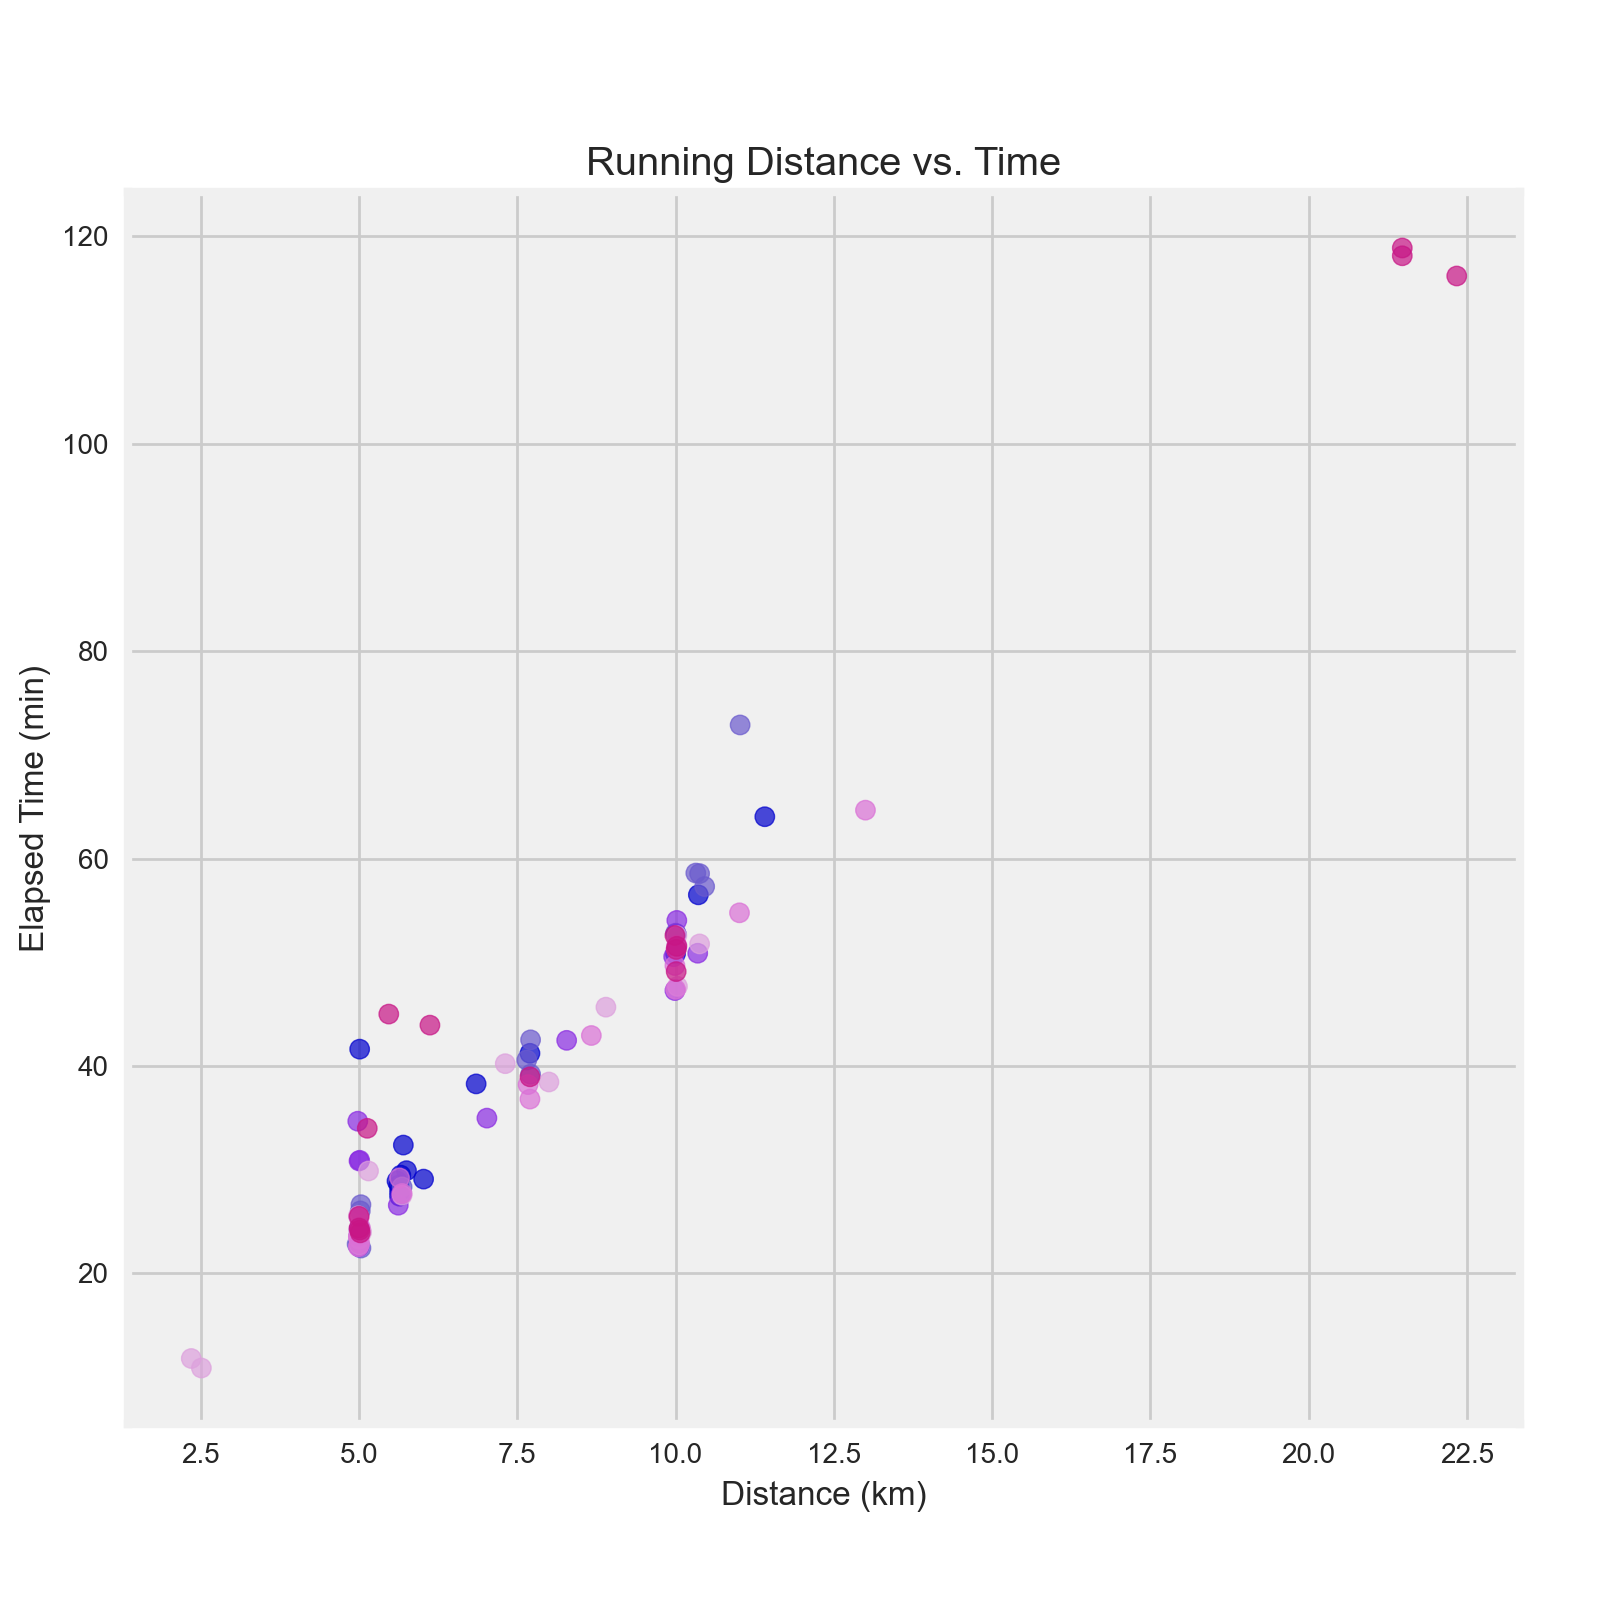

In [853]:
plt.figure(figsize = (8,8))

plt.scatter(data = strava_df, x = 'Distance', y = 'Elapsed Time', c = col_list, alpha = 0.7)
plt.xlabel('Distance (km)')
plt.ylabel('Elapsed Time (min)')
plt.title('Running Distance vs. Time')
plt.show()

In [854]:
%matplotlib notebook

In [855]:
strava_df = strava_df[strava_df['Distance'] < 19]

In [864]:
strava_df['Pace'] = strava_df['Elapsed Time']/strava_df['Distance']
strava_df

<ipython-input-864-44422bd6d9fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strava_df['Pace'] = strava_df['Elapsed Time']/strava_df['Distance']


,Year,Month,Day,Elapsed Time,Distance,Pace
35,2021,1,7,29.900000,5.75,5.200000
36,2021,1,8,38.266667,6.85,5.586375
37,2021,1,10,50.816667,10.00,5.081667
38,2021,1,12,28.516667,5.63,5.065127
39,2021,1,13,29.083333,6.02,4.831118
...,...,...,...,...,...,...
124,2021,6,16,38.950000,7.70,5.058442
125,2021,6,19,25.500000,5.00,5.100000
127,2021,6,21,43.933333,6.12,7.178649
128,2021,6,25,52.583333,9.99,5.263597


In [865]:
months = [1, 2, 3, 4, 5, 6]
month_avg = []
pace_avg = ['']
month_name = ['','January', 'February', 'March', 'April', 'May', 'June']

for m in months: 
    runs = strava_df[strava_df['Month'] == m]
    avg = runs['Distance'].mean()
    month_avg.append(avg)
    
    pace = round(runs['Pace'].mean(), 2)
    pace_avg.append(pace)
    
string_pace = ['']
for i in range(1,7):
    string = str(pace_avg[i])
    string += ' km'
    string_pace.append(string)
    
string_pace

['', '5.4 km', '5.23 km', '5.19 km', '4.93 km', '4.9 km', '5.59 km']

<IPython.core.display.Javascript object>


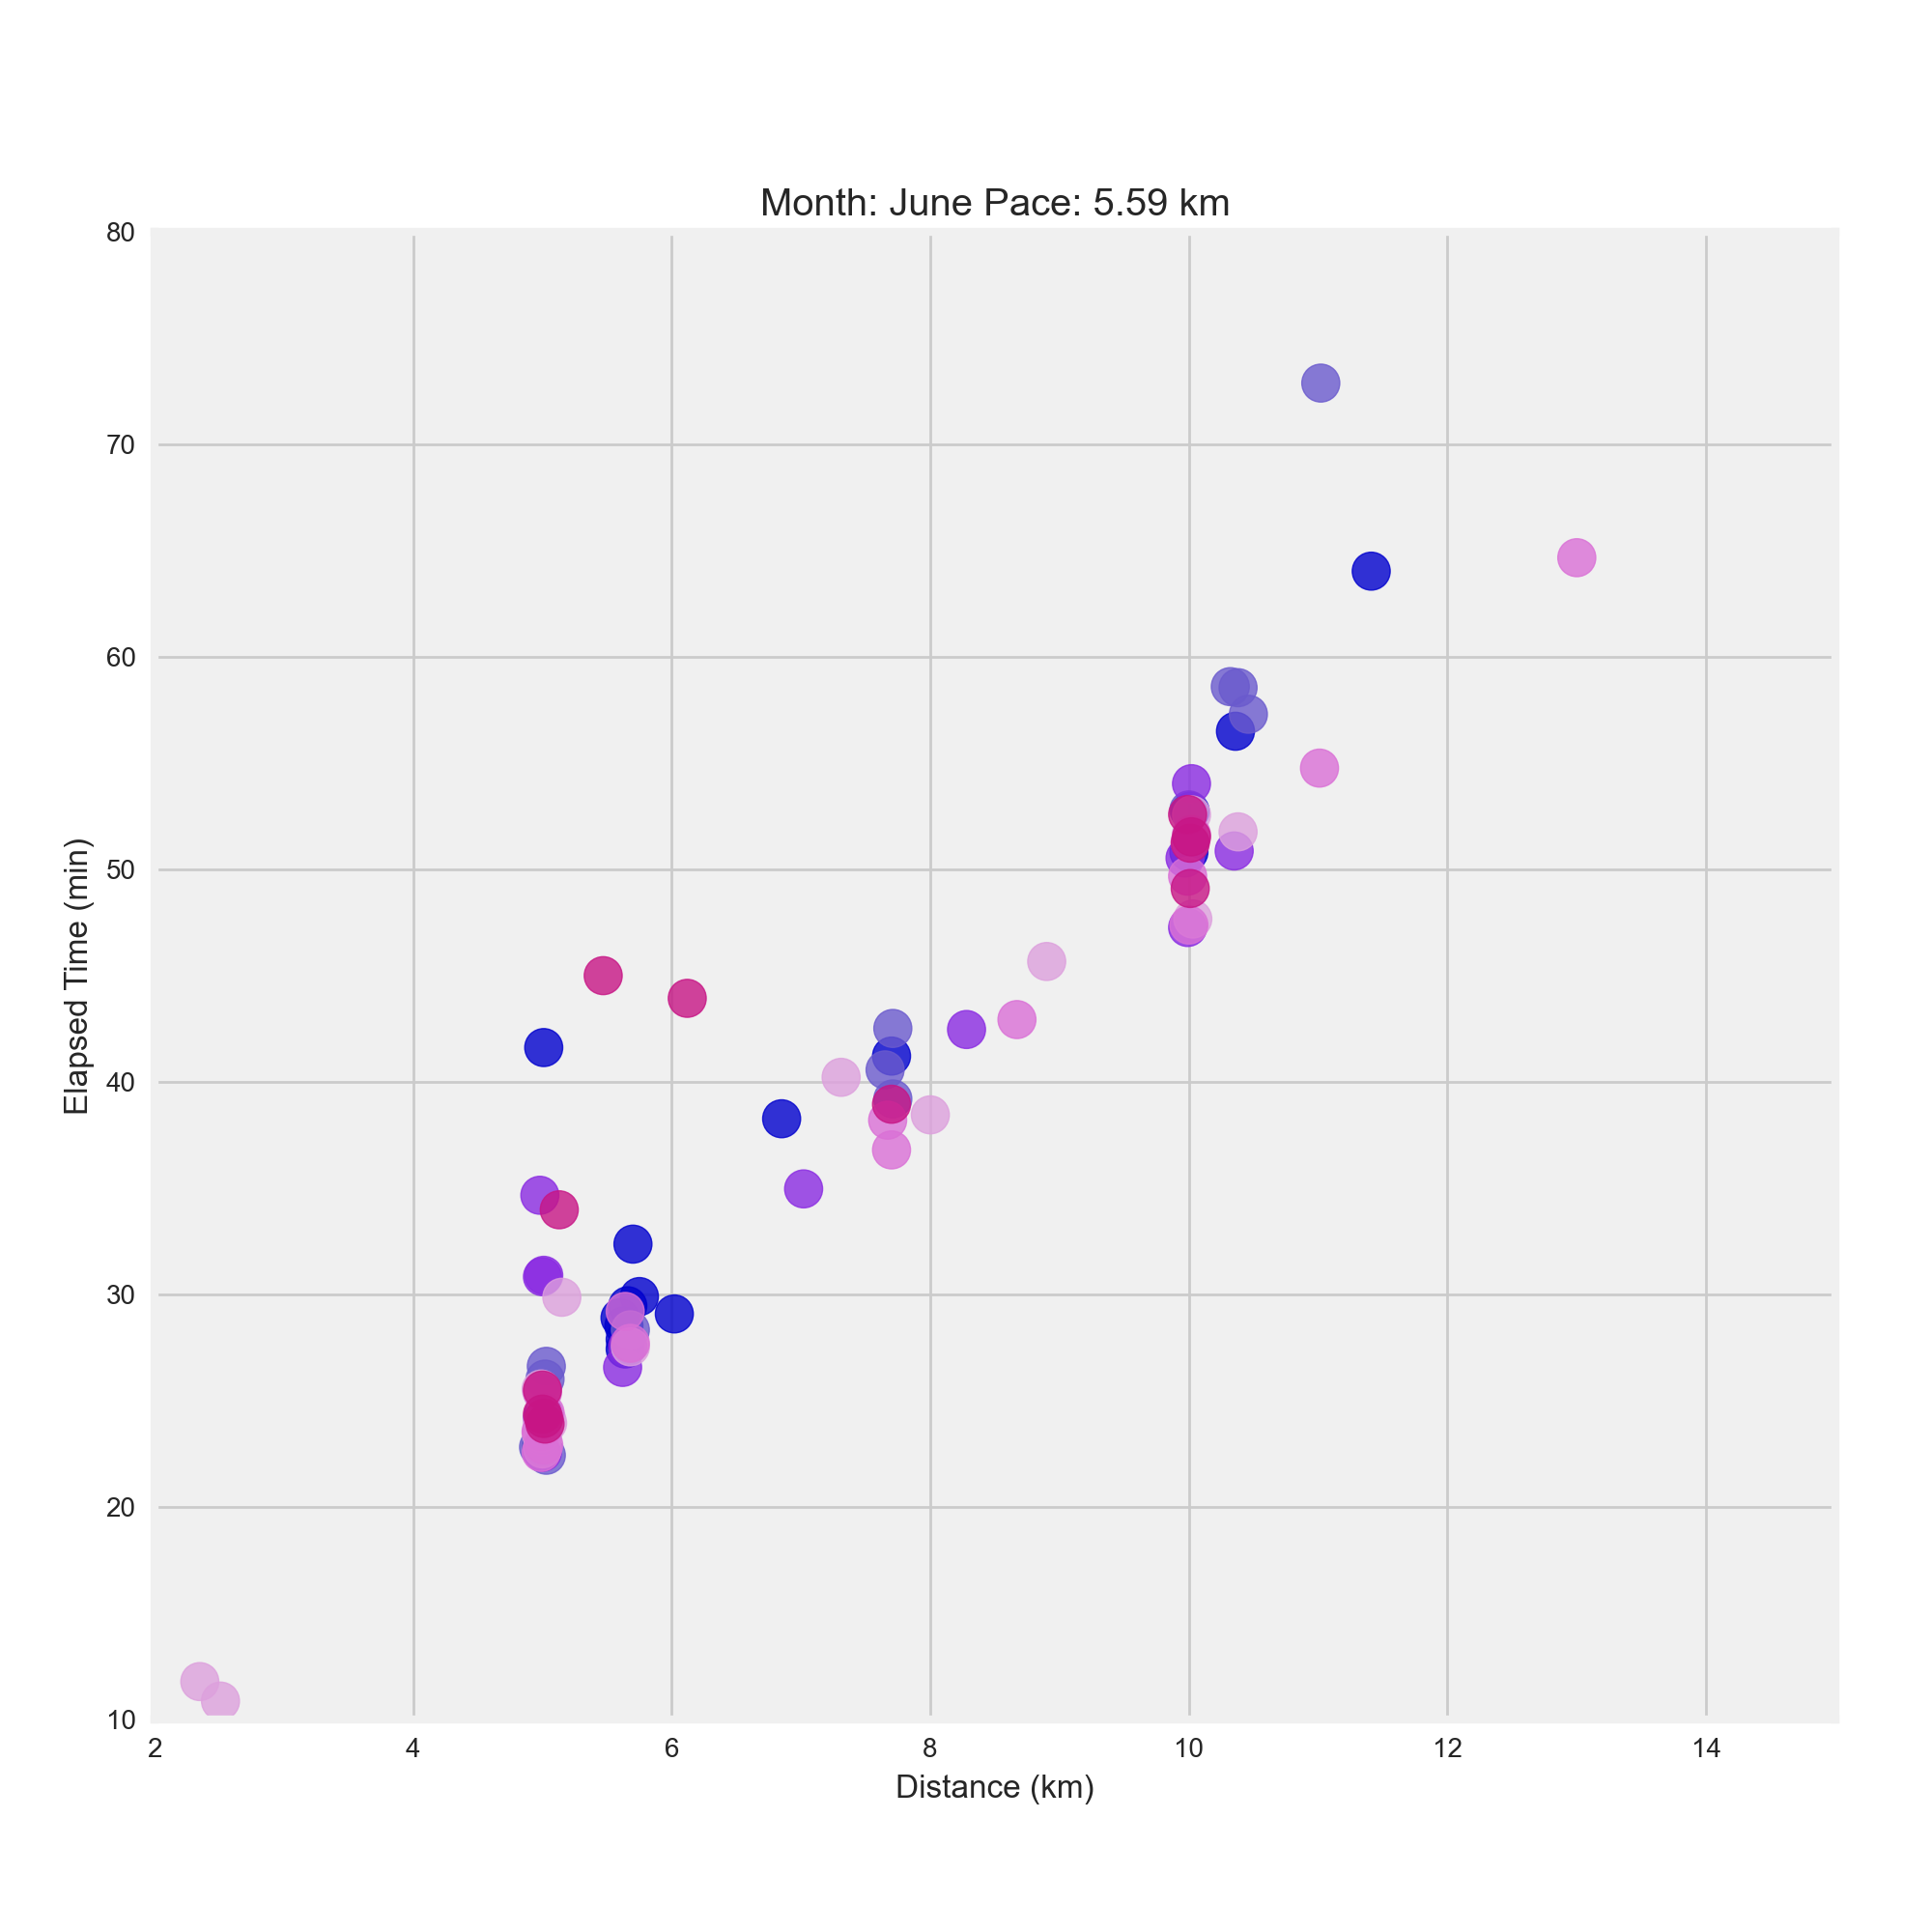

In [880]:
from matplotlib.animation import FuncAnimation
import numpy as np

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(xlim=(2, 15), ylim=(10, 80))

scat = ax.scatter([], [], s = 200, alpha = 0.8)


ax.set_title('Month:  Pace:')
ax.set_xlabel('Distance (km)')
ax.set_ylabel('Elapsed Time (min)')


def animate(i):
    x = np.array([])
    y = np.array([])
    
    
    for m in range(0, i + 1):
        ax.set_title('Month: ' + month_name[m] + ' Pace: ' + string_pace[m])
        
        x = np.concatenate([x, strava_df.loc[strava_df['Month'] == m, 'Distance']])
        y = np.concatenate([y, strava_df.loc[strava_df['Month'] == m, 'Elapsed Time']])    
        
    scat.set_offsets(np.array([x, y]).T)
    scat.set_color(col_list)
    
    return scat,

anim = FuncAnimation(fig, animate, frames=7, interval=1000, repeat=False, blit = True)
plt.show()

In [881]:
anim.save('C:/Users/Dillon/Datasets/animation.gif', writer='imagemagick')